In [1]:
import json
import numpy as np

In [2]:
#### import all predictions
tf_pred = json.load(open('tf_processed.json','r'))

In [3]:
res_pred = json.load(open('res152_pred.json','r'))

In [4]:
vgg_pred = json.load(open('vgg_pred.json','r'))

In [5]:
le_pred = json.load(open('lenet_pred.json','r'))

In [6]:
cf_pred = json.load(open('caffe_pred.json','r'))

In [7]:
targets = json.load(open('targets.json','r'))

In [8]:
def mixture(t,r,v,l,c):
    error_mix = [0]*len(t)
    for k,tv in tf_pred.items():
        target = targets[k]
        tv = np.array(tv)
        rv = np.array(res_pred[k])
        vv = np.array(vgg_pred[k])
        lv = np.array(le_pred[k])
        cv = np.array(cf_pred[k])
        for i in range(len(t)):
            mix = t[i]*tv+r[i]*rv+v[i]*vv+l[i]*lv+c[i]*cv
            top_k = mix.argsort()[::-1][:5]
            if target not in top_k:
                error_mix[i]+=1
    
    for i in range(len(t)):
        er = float(error_mix[i])/len(tf_pred)
        print "T:R:L:V:C=%.3f:%.3f:%.3f:%.3f:%.3f, %d misclassification, %f error rate." % (t[i],r[i],l[i],v[i],c[i],error_mix[i],er)


In [17]:
def mixture_confidence(t,r,v,l,c):
    error_mix = [0]*len(t)
    for k,tv in tf_pred.items():
        target = targets[k]
        tv = np.array(tv)
        rv = np.array(res_pred[k])
        vv = np.array(vgg_pred[k])
        lv = np.array(le_pred[k])
        cv = np.array(cf_pred[k])
        for i in range(len(t)):
            mix = t[i]*tv+r[i]*rv+v[i]*vv+l[i]*lv+c[i]*cv
            top_k = mix.argsort()[::-1][:1]
            if target == top_k:
                error_mix[i]+=1
    
    for i in range(len(t)):
        er = float(error_mix[i])/len(tf_pred)
        print "T:R:L:V:C=%.3f:%.3f:%.3f:%.3f:%.3f, %d correct classification, %f accuracy rate." % (t[i],r[i],l[i],v[i],c[i],error_mix[i],er)


In [15]:
def top_1_accuracy():
    count = np.zeros((5,))
    for k, tv in tf_pred.items():
        target = targets[k]
        tv = np.array(tv)
        top1_tv = np.argmax(tv)
        if top1_tv == target:
            count[0] += 1
        rv = np.array(res_pred[k])
        top1_rv = np.argmax(rv)
        if top1_rv == target:
            count[1] += 1
        vv = np.array(vgg_pred[k])
        top1_vv = np.argmax(vv)
        if top1_vv == target:
            count[2] += 1
        lv = np.array(le_pred[k])
        top1_lv = np.argmax(lv)
        if top1_lv == target:
            count[3] += 1
        cv = np.array(cf_pred[k])
        top1_cv = np.argmax(cv)
        if top1_cv == target:
            count[4] += 1
        
    print('total {} predictions'.format(len(tf_pred)))
    print('correct predictions: ', count)
    print('accuracy: ', count/float(len(tf_pred)))
        
        

In [16]:
top_1_accuracy()

total 50000 predictions
('correct predictions: ', array([ 38806.,  36462.,  33075.,  34012.,  28014.]))
('accuracy: ', array([ 0.77612,  0.72924,  0.6615 ,  0.68024,  0.56028]))


In [21]:
tp = [0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]

base = [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
rp = [0.7*i for i in base]
lp = [0.2*i for i in base]
vp = [0.1*i for i in base]
cp = [0]*9

In [22]:
mixture_confidence(tp,rp,vp,lp,cp)

T:R:L:V:C=0.910:0.630:0.180:0.090:0.000, 39193 correct classification, 0.783860 accuracy rate.
T:R:L:V:C=0.920:0.560:0.160:0.080:0.000, 39257 correct classification, 0.785140 accuracy rate.
T:R:L:V:C=0.930:0.490:0.140:0.070:0.000, 39293 correct classification, 0.785860 accuracy rate.
T:R:L:V:C=0.940:0.420:0.120:0.060:0.000, 39284 correct classification, 0.785680 accuracy rate.
T:R:L:V:C=0.950:0.350:0.100:0.050:0.000, 39270 correct classification, 0.785400 accuracy rate.
T:R:L:V:C=0.960:0.280:0.080:0.040:0.000, 39238 correct classification, 0.784760 accuracy rate.
T:R:L:V:C=0.970:0.210:0.060:0.030:0.000, 39176 correct classification, 0.783520 accuracy rate.
T:R:L:V:C=0.980:0.140:0.040:0.020:0.000, 39081 correct classification, 0.781620 accuracy rate.
T:R:L:V:C=0.990:0.070:0.020:0.010:0.000, 38944 correct classification, 0.778880 accuracy rate.


In [29]:
mixture(tp,rp,vp,lp,cp)

T:R:L:V:C=0.910:0.630:0.180:0.090:0.000, 3051 misclassification, 0.061020 error rate.
T:R:L:V:C=0.920:0.560:0.160:0.080:0.000, 3028 misclassification, 0.060560 error rate.
T:R:L:V:C=0.930:0.490:0.140:0.070:0.000, 3002 misclassification, 0.060040 error rate.
T:R:L:V:C=0.940:0.420:0.120:0.060:0.000, 2998 misclassification, 0.059960 error rate.
T:R:L:V:C=0.950:0.350:0.100:0.050:0.000, 2994 misclassification, 0.059880 error rate.
T:R:L:V:C=0.960:0.280:0.080:0.040:0.000, 2975 misclassification, 0.059500 error rate.
T:R:L:V:C=0.970:0.210:0.060:0.030:0.000, 2978 misclassification, 0.059560 error rate.
T:R:L:V:C=0.980:0.140:0.040:0.020:0.000, 2959 misclassification, 0.059180 error rate.
T:R:L:V:C=0.990:0.070:0.020:0.010:0.000, 2944 misclassification, 0.058880 error rate.


**confidence prediction**

In [38]:
w_best = np.array([0.930,0.490,0.140,0.070,0]) ### T:R:L:V:C
ensemble_acc = 0.7859

In [29]:
def ensemble_confidence_evaluation(num=3):
    total_c = 0
    total_u = 0
    correct_c = 0
    correct_u = 0
    
    for k, tv in tf_pred.items():
        target = targets[k]
        tv = np.array(tv)
        pred_tv = np.argmax(tv)
        rv = np.array(res_pred[k])
        pred_rv = np.argmax(rv)
        lv = np.array(le_pred[k])
        pred_lv = np.argmax(lv)
        vv = np.array(vgg_pred[k])
        pred_vv = np.argmax(vv)
        cv = np.array(cf_pred[k])
        pred_cv = np.argmax(cv)
        
        res = w_best[0]*tv + w_best[1]*rv + w_best[2]*lv + w_best[3]*vv + w_best[4]*cv
        pred = np.argmax(res)
        if len(set([pred_tv, pred_rv, pred_lv, pred_vv, pred_cv])) <= (6-num):
            total_c += 1
            if pred == target:
                correct_c += 1
        else:
            total_u += 1
            if pred == target:
                correct_u += 1
    
    print('total_c = {}, correct_c = {}, acc = {}'.format(total_c, correct_c, float(correct_c)/total_c))
    print('total_u = {}, correct_u = {}, acc = {}'.format(total_u, correct_u, float(correct_u)/total_u))
    

In [30]:
ensemble_confidence_evaluation(num=3)

total_c = 44421, correct_c = 36979, acc = 0.832466626145
total_u = 5579, correct_u = 2314, acc = 0.414769671984


In [31]:
ensemble_confidence_evaluation(num=4)

total_c = 37033, correct_c = 32464, acc = 0.876623551967
total_u = 12967, correct_u = 6829, acc = 0.526644559266


In [32]:
ensemble_confidence_evaluation(num=5)

total_c = 24223, correct_c = 22637, acc = 0.934525038187
total_u = 25777, correct_u = 16656, acc = 0.646157427164


In [37]:
1-24223/50000.0

0.51554

**robust prediction plot**

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

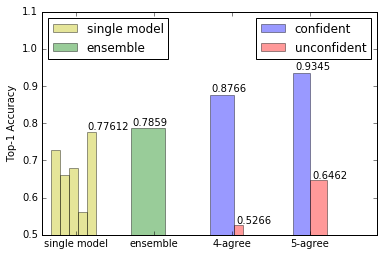

In [47]:
original_acc = [ 0.72924,  0.6615 ,  0.68024,  0.56028, 0.77612]

fig, ax = plt.subplots()
four_agree_c = (0.8766, 0.74066)  ## the second is the proportion
four_agree_u = (0.5266, 0.25934)

five_agree_c = (0.9345, 0.48446)
five_agree_u = (0.6462, 0.51554)

bar_width = 0.3
opacity = 0.4

thin_bar = 0.08

for i in range(len(original_acc)):
    if i == 0:
        rects0 = plt.bar(thin_bar*(i+1), original_acc[i], thin_bar, alpha=opacity, color='y', label='single model')
    else:
        plt.bar(thin_bar*(i+1), original_acc[i], thin_bar, alpha=opacity, color='y')

    
rects1 = plt.bar(0.5+bar_width, ensemble_acc, bar_width, alpha=opacity, color='g', label='ensemble')
rects2 = plt.bar(1.2+bar_width, four_agree_c[0], four_agree_c[1]*bar_width,  alpha=opacity, color='b', label='confident')
rects3 = plt.bar(1.12+bar_width*2, four_agree_u[0], four_agree_u[1]*bar_width,  alpha=opacity, color='r', label='unconfident')
plt.bar(1.95+bar_width, five_agree_c[0], five_agree_c[1]*bar_width,  alpha=opacity, color='b')
plt.bar(2.1+bar_width, five_agree_u[0], five_agree_u[1]*bar_width,  alpha=opacity, color='r')


plt.ylabel('Top-1 Accuracy')
ax.set_ylim([0.5,1.1])

first_legend = plt.legend(handles=[rects0,rects1], loc=2)
axx = plt.gca().add_artist(first_legend)
second_legend = plt.legend(handles=[rects2,rects3], loc=1)


ind = np.array([0.3,1,1.7,2.4])
plt.xticks(ind, ('single model', 'ensemble', '4-agree', '5-agree'))

cnt = 0
for p in ax.patches:
    if cnt >= 4:
        ax.annotate(str(float(p.get_height())), (p.get_x() * 1.01, p.get_height() * 1.01))
    cnt += 1
plt.savefig('/Users/xinw/Documents/2016Fall/clipper/imagenet_ensemble_confidence_plot.pdf')



import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ind = np.arange(5)
error = (6525,5760,4512,3088,2930)
width = 0.35       # the width of the bars
rects1 = ax.bar(ind, error, width)


# add some text for labels, title and axes ticks
ax.set_ylabel('misclassification')
ax.set_xticks(ind + width)
ax.set_xticklabels(('VGG(caffe)', 'Lenet(caffe)', 'Resnet(caffe)', 'Inception v3(tensorflow)', 'mixture'))


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()